<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Proctor%20Modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,1,2,3,4
PESO MOLDE SUELO,6610.00,6696.00,6805.00,6782.00
PESO MOLDE,4778.00,4778.00,4778.00,4778.00
PESO SUELO COMPACTADO,1823.00,1918.00,2027.00,2004.00
DENSIDAD HUMEDA,1.81,1.91,2.02,1.99
PESO SUELO HUMEDO TARA,362.70,283.80,262.90,274.00
PESO SUELO SECO TARA,305.60,234.90,213.90,219.50
PESO AGUA,57.10,48.90,49.00,54.50
PESO SUELO SECO,305.60,234.90,213.90,219.50
CONTENIDO HUMEDAD,18.68,20.82,22.91,24.83
DENSIDAD SECA,1.53,1.58,1.64,1.60


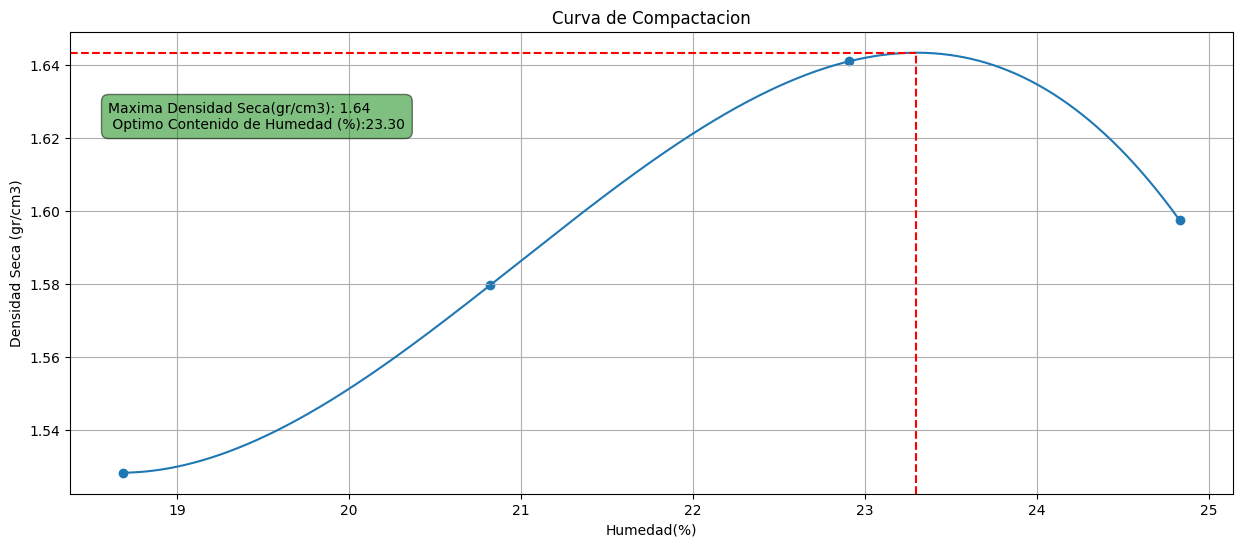

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display
from IPython.display import HTML
from sklearn.metrics import r2_score

peso_molde_suelo = np.array([6610, 6696, 6805, 6782])
peso_molde = 4778
peso_suelo_compactado = np.array([1823, 1918, 2027, 2004])
volumen_molde = 1005
densidad_humedad = np.divide(peso_suelo_compactado, volumen_molde)
peso_suelo_humedo_tara = np.array([362.7, 283.8, 262.9, 274])
peso_suelo_seco_tara = np.array([305.6, 234.9, 213.9, 219.5])
peso_agua = np.subtract(peso_suelo_humedo_tara, peso_suelo_seco_tara)
peso_suelo_seco = np.array([305.6, 234.9, 213.9, 219.5])
contenido_humedad = np.divide(peso_agua*100, peso_suelo_seco)
densidad_seca = np.divide(densidad_humedad, 1+ contenido_humedad /100 )


#Mostrando nuestro valores en una tabla:
tabla = {"PESO MOLDE SUELO":peso_molde_suelo, "PESO MOLDE":peso_molde, "PESO SUELO COMPACTADO":peso_suelo_compactado,
         "DENSIDAD HUMEDA": densidad_humedad, "PESO SUELO HUMEDO TARA": peso_suelo_humedo_tara,
         "PESO SUELO SECO TARA": peso_suelo_seco_tara, "PESO AGUA": peso_agua, "PESO SUELO SECO":peso_suelo_seco,
         "CONTENIDO HUMEDAD": contenido_humedad, "DENSIDAD SECA":densidad_seca
         }

tabla_pandas = pd.DataFrame(tabla, index = [1,2,3,4]).T.round(2)
#print(tabla_pandas)

tabla_estilos = (
    tabla_pandas.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

#Ajuste de regresion polinomial
coeficientes = np.polyfit(contenido_humedad, densidad_seca, 3)
poly = np.poly1d(coeficientes)

#Derivando
derivada = np.polyder(poly)
raices = np.roots(derivada)
optimo_contenido_humedad_0 = np.max(raices)
densidad_seca_max_0 = poly(optimo_contenido_humedad_0)


#Calcularemos el optimo contenido de humedad y maxima densidad generando una cierta cantidad de puntos
contenido_humedad_rango = np.linspace(min(contenido_humedad), max(contenido_humedad),1000)
densidad_seca_rango = poly(contenido_humedad_rango)
densidad_seca_max = np.max(densidad_seca_rango)
indice_max_densidad_seca = np.argmax(densidad_seca_rango)
optimo_contenido_humedad = contenido_humedad_rango[indice_max_densidad_seca]

#Calculando los valore  de densidad seca predecido
densidad_seca_pred = poly(contenido_humedad)

#Calculando el factor de correlacion de datos
r2 = r2_score(densidad_seca, densidad_seca_pred )

#Graficando con Matplotlib
plt.figure(figsize =(15,6))
ax = plt.gca()
plt.scatter(contenido_humedad, densidad_seca)
plt.plot(contenido_humedad_rango, densidad_seca_rango)

#Determinando los valores maximos y minimos en los ejes x e y
x_min,x_max = ax.get_xlim()
y_min,y_max = ax.get_ylim()

#Normalizando nuestros valores a la escala que oscila entre [0,1]
x_normalizado = (optimo_contenido_humedad - x_min)/(x_max - x_min)
y_normalizado = (densidad_seca_max - y_min)/(y_max - y_min)

#Trazando las rectas horizontales y verticales al putno maximo de la curva
plt.axvline(x = optimo_contenido_humedad, ymin = 0, ymax = y_normalizado, color = 'red', linestyle = '--')
plt.axhline(y = densidad_seca_max, xmin = 0, xmax = x_normalizado, color = 'red', linestyle = '--')

#Agregar un texto estilizado a nuestra tabla con los resultados del OCH, MDS
estilo_caja = dict(facecolor = 'green', alpha =0.5, edgecolor = 'black', boxstyle = 'round, pad =0.5')
plt.text(18.6, 1.63, f'Maxima Densidad Seca(gr/cm3): {densidad_seca_max:.2f}\n Optimo Contenido de Humedad (%):{optimo_contenido_humedad:.2f}'
, ha ='left', va = 'top', bbox = estilo_caja )


plt.xlabel('Humedad(%)')
plt.ylabel('Densidad Seca (gr/cm3)')
plt.title('Curva de Compactacion')
plt.grid()

plt.show()










